# Game: Caesar Cipher

## 1. Rules

In this program, we convert normal English into secret code. We can also convert secret codes back into regular English. Only someone who knows the key to the secret codes will be able to understand the messages.

## 2. Flowchart

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment='Caesar Cipher')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node('Ask for Mode & Message', 'Ask for \n Mode & Message')
dot.node('Ask for Key', 'Ask for \n Key')

print_translation = Digraph('Print translated Message', node_attr={'shape': 'doublecircle', 'color': 'green', 'style': 'filled', 'fillcolor': 'white'})
print_translation.node('Print translated Message','Print \n translated \n Message')
dot.subgraph(print_translation)

dot.node('Translate message by Key', 'Translate \n message \n by Key')
dot.node('Check if message English', 'Check if \n message \n English')
dot.node('Increment Key', 'Increment \n Key')

dot.node('Translate Again?', 'Translate \n Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [3]:
dot.edge('START', 'Ask for Mode & Message')
dot.edge('Ask for Mode & Message', 'Ask for Key', label='Encrypt \n or \n Decrypt')
dot.edge('Ask for Key', 'Print translated Message')

dot.edge('Ask for Mode & Message', 'Translate message by Key', label='Brute \n Force')
dot.edge('Translate message by Key', 'Check if message English')
dot.edge('Check if message English', 'Print translated Message', label='Yes')
dot.edge('Check if message English', 'Increment Key', label='No')
dot.edge('Increment Key', 'Translate message by Key')

dot.edge('Print translated Message', 'Translate Again?')
dot.edge('Translate Again?', 'Ask for Mode & Message', label='Yes')
dot.edge('Translate Again?', 'END', label='No')

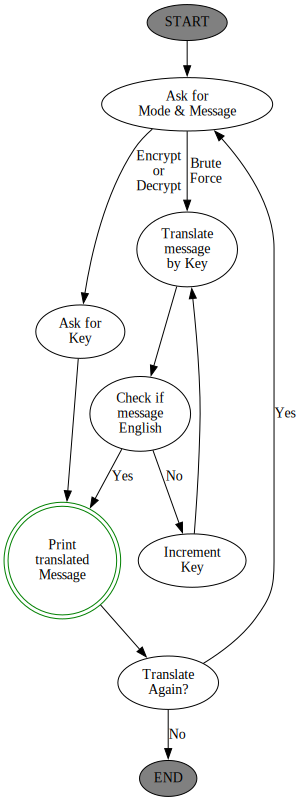

In [4]:
dot

## 3. Program

In [5]:
# Setting the maximum key length.
SYMBOLS = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz123456789!@#$%^&*()"
MAX_KEY_SIZE = len(SYMBOLS)

# This will help retrieve english words from the many messages printed by the brute force mode.
import nltk
nltk.download('words')
# The Natural Language Toolkit (nltk) is a python library used for Natural Language Processing (NLP)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pauly\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
# Function determines whether the user wants to encrypt or decrypt or use the brute force (no key).
def getMode():
    while True:
        print("Do you wish to encrypt, decrypt or brute-force a message?")
        mode = input().lower()
        if mode in ['encrypt', 'e', 'decrypt', 'd', 'brute', 'b']:
            return mode
        else:
            print('Enter either "encrypt" or "e" or "decrypt" or "d" or "brute" or "b".')

In [7]:
# Function retrieves the message from the user.
def getMessage():
    print('Enter your message:')
    return input()

In [8]:
# Function retrieves the key from the user.
def getKey():
    key = 0
    while True:
        print('Enter the key number (1-%s)' % (MAX_KEY_SIZE))
        key = int(input())
        if (key >= 1 and key <= MAX_KEY_SIZE):
            return key

In [9]:
# Function translates the message.
def getTranslatedMessage(mode, message, key):
    if mode[0] == 'd':
        key = -key
    translated = ''

    for symbol in message:
        symbolIndex = SYMBOLS.find(symbol)
        if symbolIndex == -1: # Symbol not found in SYMBOLS.
            # Just add this symbol without any change.
            translated += symbol
        else:
            # Encrypt or decrypt
            symbolIndex += key

            if symbolIndex >= len(SYMBOLS):
                symbolIndex -= len(SYMBOLS)
            elif symbolIndex < 0:
                symbolIndex += len(SYMBOLS)

            translated += SYMBOLS[symbolIndex]
    return translated

In [10]:
# Function retrieves the Key that unlocks the message
def getEnglish(messageList):
    englishWords = set(nltk.corpus.words.words())
    largestEnglishCount = 0
    correcKey = 1
    
    # Look for the sequence of english words in each decrypted message
    englishCounts = [(messageList.index(message)+1,
                      sum(1 for word in message.split() if word.lower() in englishWords))
                     for message in messageList]
    # Get the message with the largest sequence of english words
    correctKey, largestEnglishCount = max(englishCounts, key=lambda x: x[1])
    print(correctKey, messageList[correctKey-1])

In [11]:
print('C A E S A R   C I P H E R !')
print()
while True:
    mode = getMode()
    message = getMessage()

    if mode[0] != 'b':
        key = getKey()
        print('Your translated text is:')
        print(getTranslatedMessage(mode,message,key))

    else:
        print('Your translated text is:')
        key = 1
        translatedList=[]
        for key in range(1, MAX_KEY_SIZE + 1):
            ##translatedMessage = getTranslatedMessage('decrypt', message, key)
            translatedList.append(getTranslatedMessage('decrypt', message, key))
            key += 1
        getEnglish(translatedList)
            
    print('Do you want to translate again? (yes or no)')
    if not input().lower().startswith('y'):
        break

C A E S A R   C I P H E R !

Do you wish to encrypt, decrypt or brute-force a message?


 encrypt


Enter your message:


 We will eat pizza with Mario tonight at the Canteen at 9:00PM.


Enter the key number (1-71)


 57


Your translated text is:
IQ iUXX QMf bUllM iUfT (MdUa faZUSTf Mf fTQ 8MZfQQZ Mf u:00B(.
Do you want to translate again? (yes or no)


 yes


Do you wish to encrypt, decrypt or brute-force a message?


 decrypt


Enter your message:


 IQ iUXX QMf bUllM iUfT (MdUa faZUSTf Mf fTQ 8MZfQQZ Mf u:00B(.


Enter the key number (1-71)


 57


Your translated text is:
We will eat pizza with Mario tonight at the Canteen at 9:00PM.
Do you want to translate again? (yes or no)


 yes


Do you wish to encrypt, decrypt or brute-force a message?


 encrypt


Enter your message:


 We will eat croissants with Paul at the Bakery at 8:00AM.


Enter the key number (1-71)


 42


Your translated text is:
$B TFII B*Q )OLFPP*KQP TFQE 6*RI *Q QEB r*HBOV *Q e:00q3.
Do you want to translate again? (yes or no)


 yes


Do you wish to encrypt, decrypt or brute-force a message?


 brute


Enter your message:


 $B TFII B*Q )OLFPP*KQP TFQE 6*RI *Q QEB r*HBOV *Q e:00q3.


Your translated text is:
42 We will eat croissants with Paul at the Bakery at 8:00AM.
Do you want to translate again? (yes or no)


 no


## 4. Notes

Some lexicon:
- Cryptography = science of writing secret codes
- cipher = secret code system
- encrypting = converting the plaintext into the encoded message
- ciphertext = plaintext once converted into encoded message
- decrypting = converting the ciphertext back into the plaintext
- keys = secret values that let you decrypt ciphertext
- symbols = encrypted letters

Function retrieves the Key that unlocks the message | Longer version

In [12]:
def getEnglish(messageList):
    englishWords = set(nltk.corpus.words.words())
    largestEnglishCount = 0
    correcKey = 1
    
    for message in messageList:
        englishCount = 0
        
        for word in message.split():
            
            if word.lower() in englishWords:
                englishCount += 1
                
        # We want the largest sequence of english words
        if largestEnglishCount < englishCount:
            largestEnglishCount = englishCount
            correctKey = messageList.index(message)
            
    print(correctKey, messageList[correctKey])